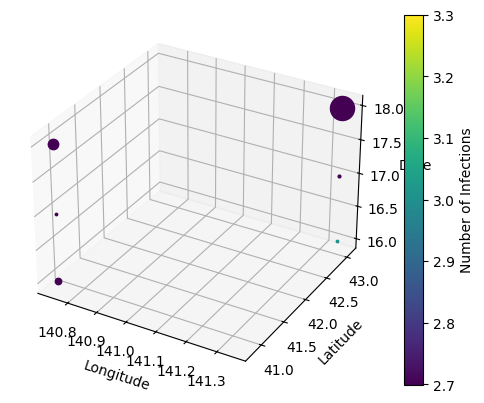

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from io import StringIO

# コロナ感染データ
corona_data = """
pref_name,2020-1-16,2020-1-17,2020-1-18
Hokkaido,3,4,300
Aomori,21,3,56
"""

# 県ごとの緯度経度データ
latlong_data = """
pref_name,lat,lon
Hokkaido,43.064359,141.347449
Aomori,40.824294,140.740054
"""

# データをDataFrameに読み込む
corona_df = pd.read_csv(StringIO(corona_data), index_col='pref_name')
latlong_df = pd.read_csv(StringIO(latlong_data), index_col='pref_name')

# 三次元ヒートマップの描画
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 県ごとに繰り返し
for pref_name in corona_df.index:
    # 緯度経度取得
    lat = latlong_df.loc[pref_name, 'lat']
    lon = latlong_df.loc[pref_name, 'lon']
    
    # 日ごとに繰り返し
    for date, value in corona_df.loc[pref_name].items():
        ax.scatter(lon, lat, int(date.split('-')[2]), c=value, cmap='viridis', s=value)

# カラーバーの表示
cbar = plt.colorbar(ax.collections[0])
cbar.set_label('Number of Infections')

# 軸ラベルの設定
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Date')

plt.show()
